9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


<ipython-input-4-feeff5584bff>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores.index, y=scores.values, palette="coolwarm")


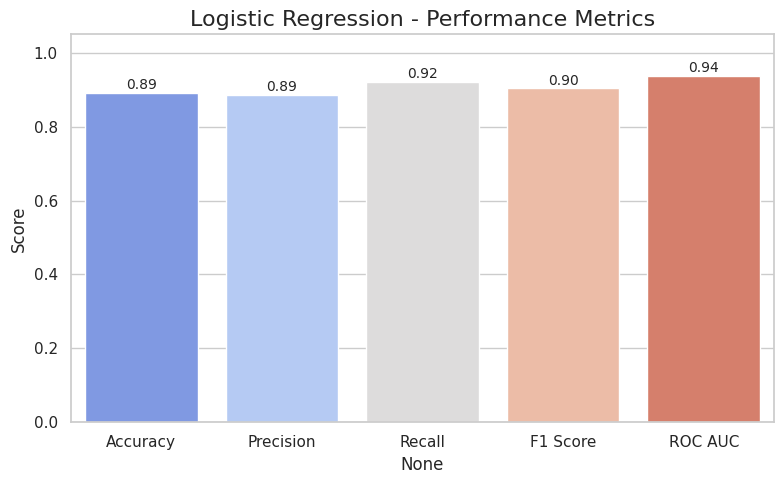

<ipython-input-4-feeff5584bff>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores.index, y=scores.values, palette="coolwarm")


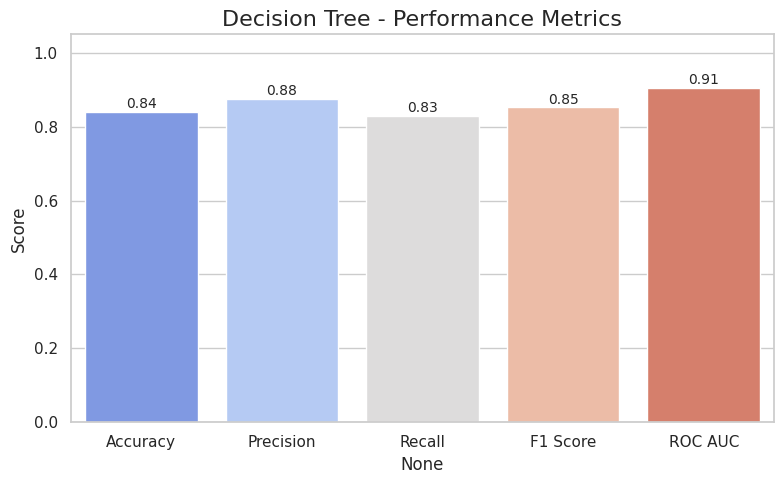

<ipython-input-4-feeff5584bff>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores.index, y=scores.values, palette="coolwarm")


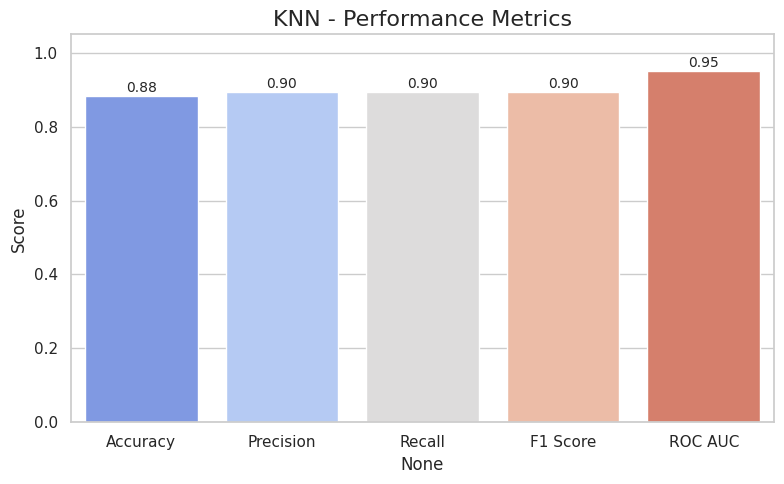

<ipython-input-4-feeff5584bff>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores.index, y=scores.values, palette="coolwarm")


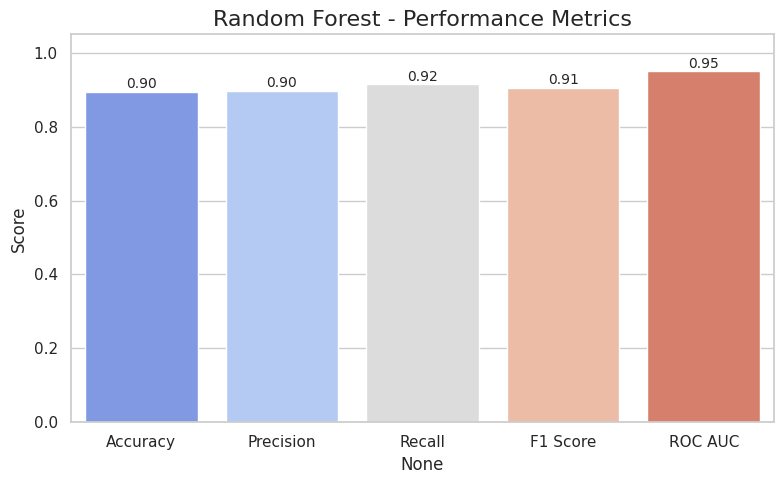

<ipython-input-4-feeff5584bff>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores.index, y=scores.values, palette="coolwarm")


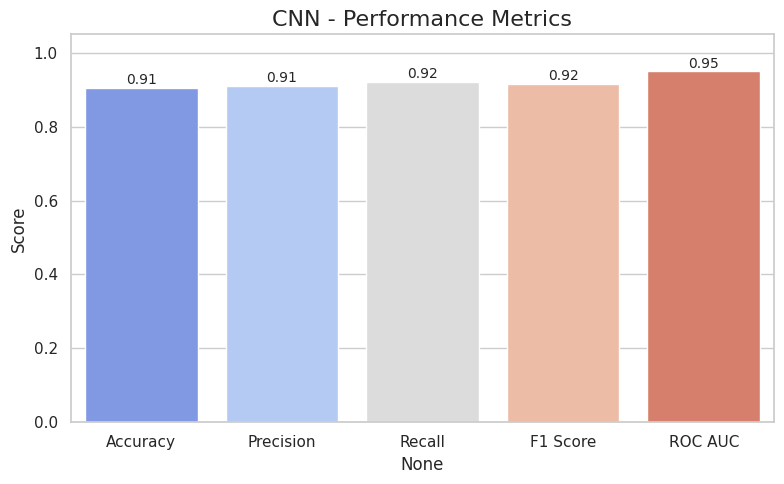

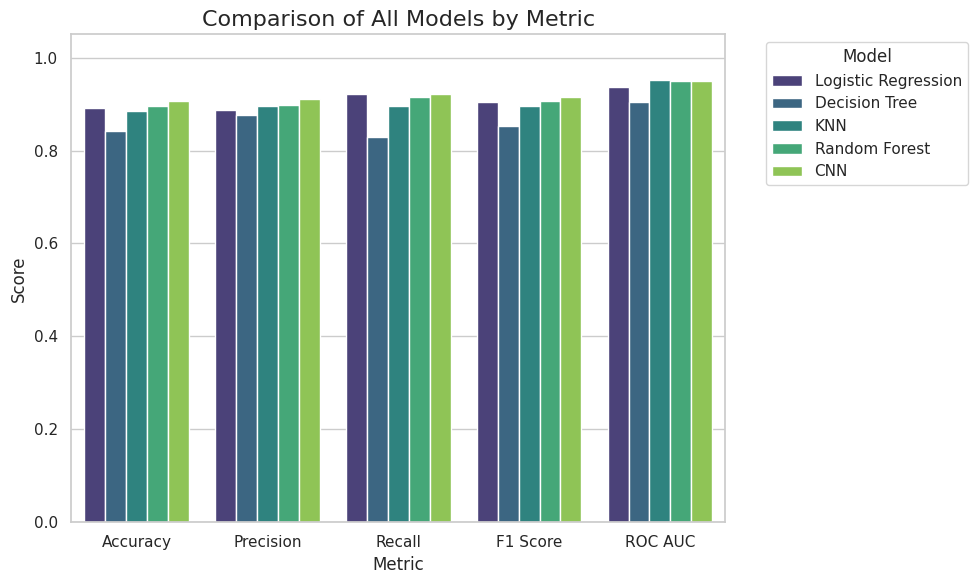


🔧 最优参数（Best Hyperparameters）:

📌 Logistic Regression:
  C: 0.1
  solver: liblinear

📌 Decision Tree:
  max_depth: 3
  min_samples_split: 2

📌 KNN:
  n_neighbors: 9
  weights: uniform

📌 Random Forest:
  max_depth: 10
  n_estimators: 100

📌 CNN:
  kernel_size: (2, 2)
  strides: (1, 1)
  pool_size: (1, 1)
  dropout_rate: 0.4
  dense_units: 32

📊 模型评估指标（Evaluation Metrics）:

📌 Logistic Regression:
  Accuracy: 0.891
  Precision: 0.887
  Recall: 0.922
  F1 Score: 0.904
  ROC AUC: 0.937

📌 Decision Tree:
  Accuracy: 0.841
  Precision: 0.876
  Recall: 0.830
  F1 Score: 0.852
  ROC AUC: 0.905

📌 KNN:
  Accuracy: 0.884
  Precision: 0.895
  Recall: 0.895
  F1 Score: 0.895
  ROC AUC: 0.952

📌 Random Forest:
  Accuracy: 0.895
  Precision: 0.897
  Recall: 0.915
  F1 Score: 0.906
  ROC AUC: 0.950

📌 CNN:
  Accuracy: 0.906
  Precision: 0.910
  Recall: 0.922
  F1 Score: 0.916
  ROC AUC: 0.950


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input

# 1. 读取和预处理数据
df = pd.read_csv("heart.csv")
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['ExerciseAngina'] = LabelEncoder().fit_transform(df['ExerciseAngina'])
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. 传统模型训练与评估
param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10], "solver": ["liblinear"]},
    "Decision Tree": {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]},
    "KNN": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, None]}
}
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}
results = {}
best_params = {}

for name in base_models:
    grid = GridSearchCV(base_models[name], param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    model = grid.best_estimator_
    best_params[name] = grid.best_params_

    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else y_pred
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    }

# 3. CNN 模型训练与评估
X_train_cnn = X_train_scaled.reshape(-1, 3, 5, 1)
X_test_cnn = X_test_scaled.reshape(-1, 3, 5, 1)

def build_cnn(kernel_size=(2, 2), strides=(1, 1), pool_size=(1, 1), dropout_rate=0.3, dense_units=64):
    model = Sequential([
        Input(shape=(3, 5, 1)),
        Conv2D(32, kernel_size=kernel_size, strides=strides, activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=pool_size),
        Dropout(dropout_rate),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

param_combinations = [
    {"kernel_size": (2, 2), "strides": (1, 1), "pool_size": (1, 1), "dropout_rate": 0.3, "dense_units": 64},
    {"kernel_size": (2, 2), "strides": (1, 1), "pool_size": (2, 1), "dropout_rate": 0.3, "dense_units": 128},
    {"kernel_size": (2, 2), "strides": (1, 1), "pool_size": (1, 1), "dropout_rate": 0.4, "dense_units": 32},
    {"kernel_size": (2, 1), "strides": (1, 1), "pool_size": (1, 1), "dropout_rate": 0.3, "dense_units": 64},
    {"kernel_size": (3, 2), "strides": (1, 1), "pool_size": (1, 1), "dropout_rate": 0.2, "dense_units": 64}
]

best_cnn = None
best_f1 = 0
for params in param_combinations:
    model = build_cnn(**params)
    model.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=0)
    y_prob = model.predict(X_test_cnn).flatten()
    y_pred = (y_prob > 0.5).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_cnn = {
            "Params": params,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1,
            "ROC AUC": roc_auc_score(y_test, y_prob)
        }

# 汇总结果
results["CNN"] = {k: best_cnn[k] for k in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']}
results_df = pd.DataFrame(results).T.round(3)

# 4. 可视化

sns.set_theme(style="whitegrid")

# 每个模型单独图表
for model_name in results_df.index:
    plt.figure(figsize=(8, 5))
    scores = results_df.loc[model_name]
    sns.barplot(x=scores.index, y=scores.values, palette="coolwarm")
    plt.ylim(0, 1.05)
    plt.title(f"{model_name} - Performance Metrics", fontsize=16)
    plt.ylabel("Score")
    for i, val in enumerate(scores.values):
        plt.text(i, val + 0.01, f"{val:.2f}", ha='center', fontsize=10)
    plt.tight_layout()
    plt.show()

# 汇总对比图表：各模型在同一指标的表现
plt.figure(figsize=(10, 6))
df_melted = results_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
df_melted.rename(columns={'index': 'Model'}, inplace=True)

sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model", palette="viridis")
plt.title("Comparison of All Models by Metric", fontsize=16)
plt.ylim(0, 1.05)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# 5. 输出每个模型的最优参数
print("\n🔧 最优参数（Best Hyperparameters）:")
model_params_list = []

for model_name in best_params:
    print(f"\n📌 {model_name}:")
    param_dict = {"Model": model_name}
    for k, v in best_params[model_name].items():
        print(f"  {k}: {v}")
        param_dict[k] = v
    model_params_list.append(param_dict)

# CNN 的参数
print(f"\n📌 CNN:")
cnn_param_dict = {"Model": "CNN"}
for k, v in best_cnn["Params"].items():
    print(f"  {k}: {v}")
    cnn_param_dict[k] = v
model_params_list.append(cnn_param_dict)

# 6. 输出每个模型的评估指标
print("\n📊 模型评估指标（Evaluation Metrics）:")
for model_name, metrics in results.items():
    print(f"\n📌 {model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.3f}")
